## Ejemplo
$$ \frac{dx}{dt} = ax - bxy $$
$$ \frac{dy}{dt} = -cy + dxy $$

$ 
\begin {cases}
    Variables:\\
    a = numero de presas\\
    y = numero de depredadores\\
    t = tiempo de observacion
\end{cases}
$
$ 
\begin {cases}
Coeficientes:\\
    a = razon de crecimiento de la presa (0,5)\\
    c = razon de muerte del depredador (0,35)\\
    b = efecto de la interaccion depredador-presa sobre la muerte de la presa (0,7)\\
    d = efecto de la interaccion depredador-presa sobre el crecimiento del depredador (0,35)\\
\end{cases}
$
\begin {cases}
Valores iniciales:\\
t = 0\\
 x = 2\\
 y = 1\\
 h = 0.5
\end{cases}

In [1]:
# Modelo predador-presa de Lotka-Volterra
# Sistemas EDO con Runge Kutta de 2do Orden
import numpy as np

def rungekutta2_fg(f,g,t0,x0,y0,h,muestras):
    tamano = muestras +1
    tabla = np.zeros(shape=(tamano,3),dtype=float)
    tabla[0] = [t0,x0,y0]
    ti = t0
    xi = x0
    yi = y0
    for i in range(1,tamano,1):
        K1x = h * f(ti,xi,yi)
        K1y = h * g(ti,xi,yi)
        
        K2x = h * f(ti+h, xi + K1x, yi+K1y)
        K2y = h * g(ti+h, xi + K1x, yi+K1y)

        xi = xi + (1/2)*(K1x+K2x)
        yi = yi + (1/2)*(K1y+K2y)
        ti = ti + h
        
        tabla[i] = [ti,xi,yi]
    tabla = np.array(tabla)
    return(tabla)

# PROGRAMA ------------------

# INGRESO
# Parámetros de las ecuaciones
a = 0.5
b = 0.7
c = 0.35
d = 0.35

# Ecuaciones
f = lambda t,x,y : a*x -b*x*y
g = lambda t,x,y : -c*y + d*x*y

# Condiciones iniciales
t0 = 0
x0 = 2
y0 = 1

# parámetros del algoritmo
h = 0.5
muestras = 101

# PROCEDIMIENTO
tabla = rungekutta2_fg(f,g,t0,x0,y0,h,muestras)
ti = tabla[:,0]
xi = tabla[:,1]
yi = tabla[:,2]

# SALIDA
np.set_printoptions(precision=6)
print(' [ ti, xi, yi]')
print(tabla)

 [ ti, xi, yi]
[[ 0.        2.        1.      ]
 [ 0.5       1.754875  1.16975 ]
 [ 1.        1.457533  1.302069]
 [ 1.5       1.167405  1.373599]
 [ 2.        0.922773  1.381103]
 [ 2.5       0.734853  1.33689 ]
 [ 3.        0.598406  1.258434]
 [ 3.5       0.502789  1.161433]
 [ 4.        0.43776   1.05747 ]
 [ 4.5       0.39535   0.954156]
 [ 5.        0.36995   0.856056]
 [ 5.5       0.357857  0.765649]
 [ 6.        0.356772  0.684061]
 [ 6.5       0.365425  0.611594]
 [ 7.        0.383295  0.548072]
 [ 7.5       0.41044   0.493068]
 [ 8.        0.447386  0.446051]
 [ 8.5       0.495053  0.406481]
 [ 9.        0.554706  0.373878]
 [ 9.5       0.627897  0.347872]
 [10.        0.716394  0.328248]
 [10.5       0.822045  0.315003]
 [11.        0.946561  0.308414]
 [11.5       1.091121  0.309138]
 [12.        1.255739  0.318359]
 [12.5       1.438245  0.33799 ]
 [13.        1.632757  0.370937]
 [13.5       1.827612  0.421359]
 [14.        2.003072  0.494714]
 [14.5       2.130143  0.597

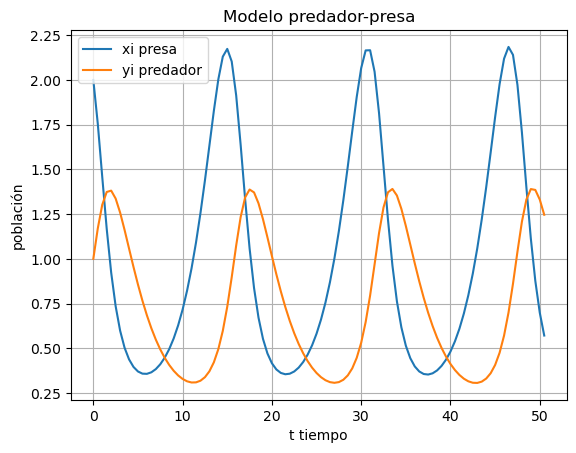

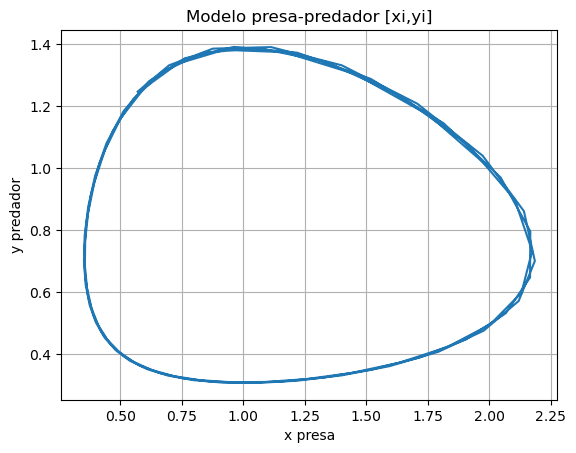

In [2]:
# Grafica tiempos vs población
import matplotlib.pyplot as plt

plt.plot(ti,xi, label='xi presa')
plt.plot(ti,yi, label='yi predador')

plt.title('Modelo predador-presa')
plt.xlabel('t tiempo')
plt.ylabel('población')
plt.legend()
plt.grid()
plt.show()

# gráfica xi vs yi
plt.plot(xi,yi)

plt.title('Modelo presa-predador [xi,yi]')
plt.xlabel('x presa')
plt.ylabel('y predador')
plt.grid()
plt.show()